In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error

In [2]:
## Загрузка данных
df = pd.read_csv('data/df_out.csv')
print(df.shape)
df.head()

(10000, 20)


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


## Data Preparation

In [3]:
# проверка на наличие дубликатов
df[df.duplicated()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

<AxesSubplot:>

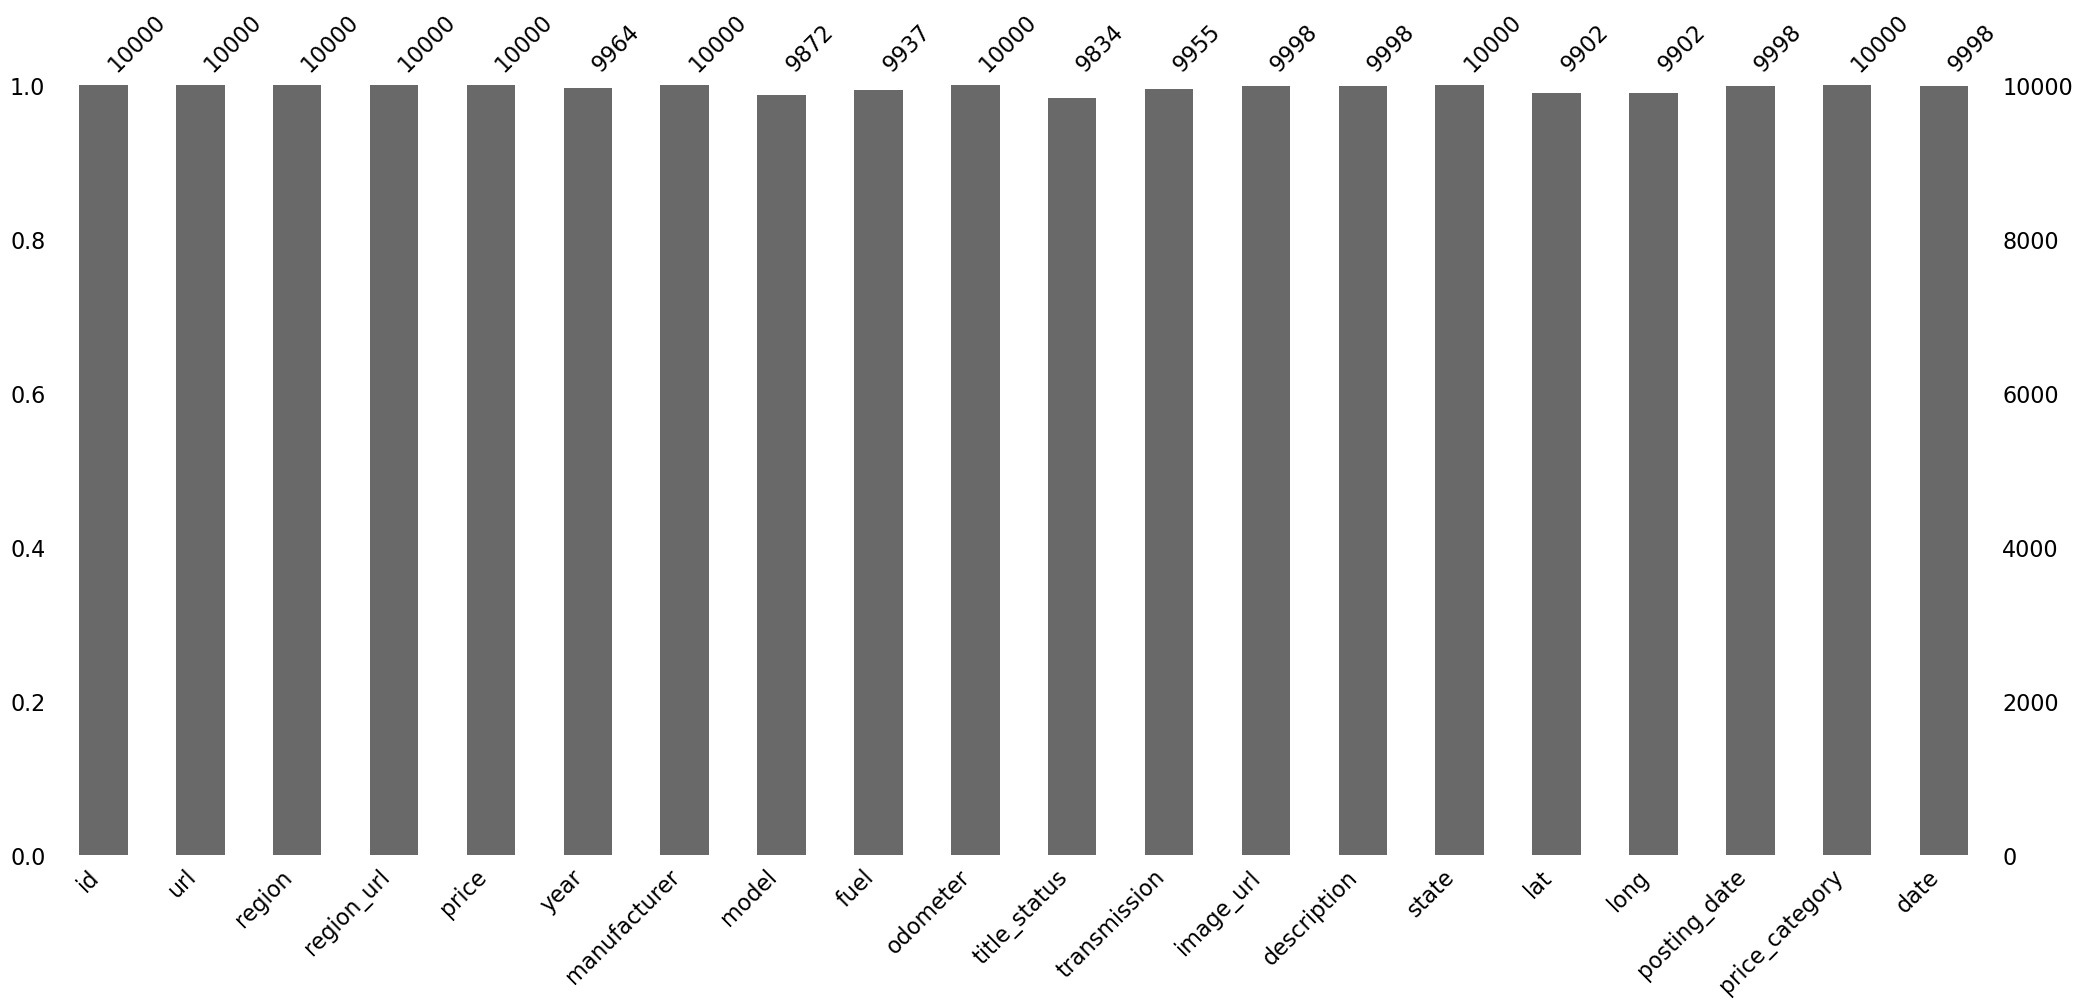

In [5]:
# статистика пропусков
msno.bar(df)

In [6]:
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values[missing_values.values > 0]

Процент пропущенных значений:


image_url       0.02
description     0.02
posting_date    0.02
date            0.02
year            0.36
transmission    0.45
fuel            0.63
lat             0.98
long            0.98
model           1.28
title_status    1.66
dtype: float64

In [7]:
# пропуски в posting_date и date
df[df.date.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
6728,7315259025,https://nh.craigslist.org/cto/d/manchester-201...,new hampshire,https://nh.craigslist.org,3750,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,nh,NaN,NaN,NaN,low,NaN
9388,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN,medium,NaN


In [8]:
# удаление строк
# на выводе видно, что в них отсутсвует информация по многим признакм: 
# year, model, fuel, title_status, transmission, image_url, description, lat, long, posting_date, date
df = df[df.date.notna()]
df.shape

(9998, 20)

In [9]:
# пропуски в title_status (наибольшее количество пропущеных значений)   
df.title_status.value_counts(dropna = False)

clean         9518
rebuilt        171
NaN            164
salvage         92
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [10]:
# информацию можно поискать в description

df[ df['title_status'].isna() &
   (df['description'].str.lower().str.contains('clean') | 
    df['description'].str.lower().str.contains('rebuilt')|
    df['description'].str.lower().str.contains('lien')|
    df['description'].str.lower().str.contains('missing')|
    df['description'].str.lower().str.contains('parts only'))]


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
11,7316540706,https://cincinnati.craigslist.org/ctd/d/fairfi...,cincinnati,https://cincinnati.craigslist.org,4995,2012.0,fiat,500 pop,gas,59242,NaN,manual,https://images.craigslist.org/00Z0Z_jbUmVcYlwR...,"2012 Fiat 500 Pop FOR ONLY $102/mo!59,242 mi. ...",oh,39.297045,-84.563243,2021-05-03T21:03:32-0400,low,2021-05-04 01:03:32+00:00
245,7315211652,https://ocala.craigslist.org/ctd/d/riverview-2...,ocala,https://ocala.craigslist.org,40990,2019.0,toyota,sienna xle,gas,3700,NaN,automatic,https://images.craigslist.org/01111_grKNF8GrXz...,2019 Toyota Sienna - Wheelchair Accessible Han...,fl,27.849760,-82.364950,2021-05-01T06:35:56-0400,high,2021-05-01 10:35:56+00:00
507,7307008438,https://columbus.craigslist.org/ctd/d/gretna-2...,columbus,https://columbus.craigslist.org,51900,2012.0,nissan,gt-r,gas,20730,NaN,manual,https://images.craigslist.org/01212_42aFmFDUi5...,Vehicle DescriptionVehicle Description2012 Nis...,oh,29.910800,-90.053100,2021-04-14T21:28:34-0400,high,2021-04-15 01:28:34+00:00
605,7311383534,https://stockton.craigslist.org/ctd/d/san-rafa...,stockton,https://stockton.craigslist.org,37988,2017.0,volvo,xc90 momentum,gas,26283,NaN,automatic,https://images.craigslist.org/00q0q_6Z4kDUhhCZ...,2017 Volvo XC90 XC 90 XC-90 Momentum FOR ONLY ...,ca,37.963201,-122.509472,2021-04-23T09:03:04-0700,high,2021-04-23 16:03:04+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,NaN,59246,NaN,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9642,7314841234,https://sarasota.craigslist.org/ctd/d/sarasota...,sarasota-bradenton,https://sarasota.craigslist.org,66900,2021.0,honda,odyssey exl,gas,13,NaN,automatic,https://images.craigslist.org/00808_hL2XdSEm18...,2021 Honda Odyssey *Wheelchair Van* *Handicap ...,fl,27.270402,-82.530222,2021-04-30T12:00:49-0400,high,2021-04-30 16:00:49+00:00
9740,7301707830,https://tricities.craigslist.org/ctd/d/bristol...,tri-cities,https://tricities.craigslist.org,8995,2013.0,honda,odyssey,gas,203112,NaN,automatic,https://images.craigslist.org/00u0u_bawW7HN8xW...,"2013 *Honda* *Odyssey* 5dr EX Van FWD - $8,995...",tn,36.541821,-82.234645,2021-04-04T13:12:27-0400,low,2021-04-04 17:12:27+00:00
9805,7313949726,https://harrisburg.craigslist.org/ctd/d/brockp...,harrisburg,https://harrisburg.craigslist.org,8900,2012.0,honda,accord,NaN,95674,NaN,NaN,https://images.craigslist.org/01212_dsfYRNhxfd...,Car Starz Call Sales at 717-401-4221 2012 Hond...,pa,41.261540,-78.704520,2021-04-28T14:25:32-0400,low,2021-04-28 18:25:32+00:00
9840,7314987181,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,20900,2014.0,lexus,rx 350,gas,70800,NaN,automatic,https://images.craigslist.org/00Q0Q_cGablAkoYV...,2014 *Lexus* *RX 350* 2014 LEXUS RX 350 SUV 1-...,tn,36.138022,-86.732261,2021-04-30T15:00:48-0500,medium,2021-04-30 20:00:48+00:00


In [11]:
# анализ показал, что там встречаются слова, с совпадающие со значениями title_status, 
# однако чаще всего они не имеют отношения к статусу автомобиля, так что, поскольку получить информацию неоткуда, 
# заполним пропуски самым популярным значениям статуса
df.title_status = df.title_status.fillna(df.title_status.mode()[0])
df.title_status.isna().sum()

0

In [12]:
# пропуски в year (годе выпуска  автомобиля)
df.year.isna().sum()

34

In [13]:
df[df.year.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
344,7304102133,https://wenatchee.craigslist.org/ctd/d/wenatch...,wenatchee,https://wenatchee.craigslist.org,35880,NaN,other,500,gas,13508,clean,automatic,https://images.craigslist.org/00J0J_6IMoEUzIIM...,2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...,wa,47.434493,-120.320759,2021-04-09T06:31:03-0700,high,2021-04-09 13:31:03+00:00
420,7316337069,https://lasvegas.craigslist.org/ctd/d/scottsda...,las vegas,https://lasvegas.craigslist.org,84995,NaN,other,Super Duty F-350 SRW,diesel,1268,clean,automatic,https://images.craigslist.org/00x0x_iQCC0Ef28S...,2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...,nv,33.458277,-111.925970,2021-05-03T11:31:39-0700,high,2021-05-03 18:31:39+00:00
425,7315662117,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,43900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00f0f_7AwipNocNH...,"2019 *Dodge* *Grand Caravan* SE - $43,900Call ...",co,39.674406,-104.998604,2021-05-02T01:11:33-0600,high,2021-05-02 07:11:33+00:00
702,7316199009,https://nashville.craigslist.org/ctd/d/nashvil...,nashville,https://nashville.craigslist.org,28498,NaN,other,olet Silverado 1500,NaN,59246,clean,automatic,https://images.craigslist.org/00T0T_dZ7nOXskCS...,2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...,tn,36.138022,-86.732261,2021-05-03T10:00:40-0500,high,2021-05-03 15:00:40+00:00
893,7316840794,https://denver.craigslist.org/ctd/d/american-f...,denver,https://denver.craigslist.org,60900,NaN,other,F-150,gas,6110,clean,automatic,https://images.craigslist.org/01616_bpzSdSRTbx...,"2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...",co,40.362248,-111.785947,2021-05-04T12:11:22-0600,high,2021-05-04 18:11:22+00:00
906,7311915616,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,67900,NaN,other,Odyssey,gas,21,clean,automatic,https://images.craigslist.org/00404_erlbeKWEkn...,2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...,co,39.674406,-104.998604,2021-04-24T10:41:06-0600,high,2021-04-24 16:41:06+00:00
1005,7306735187,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,38900,NaN,other,Grand Caravan,NaN,21,clean,automatic,https://images.craigslist.org/00F0F_3T6FM0XMZW...,"2019 *Dodge* *Grand Caravan* SE - $38,900Call ...",co,39.674406,-104.998604,2021-04-14T10:51:36-0600,high,2021-04-14 16:51:36+00:00
1217,7309954650,https://gainesville.craigslist.org/ctd/d/gaine...,gainesville,https://gainesville.craigslist.org,24975,NaN,other,CR-V,gas,44128,clean,automatic,https://images.craigslist.org/00000_2TUtAgLlCR...,"2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...",fl,29.676827,-82.319202,2021-04-20T14:46:55-0400,high,2021-04-20 18:46:55+00:00
1319,7313865045,https://westslope.craigslist.org/ctd/d/denver-...,western slope,https://westslope.craigslist.org,47900,NaN,other,a Sienna,gas,43701,clean,automatic,https://images.craigslist.org/00o0o_8XYp4Zygdj...,2018 *Toyota* *Sienna* LE Automatic Access Sea...,co,39.674406,-104.998604,2021-04-28T10:12:14-0600,high,2021-04-28 16:12:14+00:00
1845,7303344554,https://daytona.craigslist.org/ctd/d/new-smyrn...,daytona beach,https://daytona.craigslist.org,35850,NaN,other,Transit Cargo Van,gas,567,clean,automatic,https://images.craigslist.org/00a0a_d4XVrHnlxl...,"2020 *Ford* *Transit Cargo Van* T-250 148"" WB*...",fl,29.046240,-80.934561,2021-04-07T17:10:06-0400,high,2021-04-07 21:10:06+00:00


In [14]:
# видим, что год автомобиля можно взять из описания, за исключением одной строки.
# поскольку в ней также отсутсвует информация о производителе, типе топлива и коробке передач, удаляем ее.
df.drop(labels = [2629],axis = 0, inplace = True)
print(df.shape)
df[df.year.isna()].description

(9997, 20)


344     2019 *Ram* *1500* Big Horn/Lone Star 4x2 Quad ...
420     2020 *Ford* *Super Duty F-350 SRW* 1K MILES. B...
425     2019 *Dodge* *Grand Caravan* SE - $43,900Call ...
702     2019 *Chevrolet* *Silverado 1500* 2019 CHEVROL...
893     2020 *Ford* *F-150* PLATINUM FX4 Truck - $60,9...
906     2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...
1005    2019 *Dodge* *Grand Caravan* SE - $38,900Call ...
1217    2019 *Honda* *CR-V* EX 2WD SUV - $24,975Call o...
1319    2018 *Toyota* *Sienna* LE Automatic Access Sea...
1845    2020 *Ford* *Transit Cargo Van* T-250 148" WB*...
2292    2019 *Toyota* *Camry* XSE Automatic Sedan - $2...
2504    2019 *Dodge* *Grand Caravan* SE - $43,900Call ...
2819    2019 *GMC* *Acadia* AWD 4dr SLT w/SLT-1 SUV - ...
2959    2018 *Nissan* *Maxima* SR 3.5L Midnight Editio...
3294    2018 *Jeep* *Grand Cherokee* High Altitude 4x2...
3509    2020 *Ram* *3500* RAM 3500 DUALLY 4X4 CUMMINS ...
3521    2020 *Honda* *Odyssey* EX-L w/Navi/RES Automat...
3671    2019 *

In [15]:
# заполняем пустые значения year
df.year = df.year.fillna(df[df.year.isna()].description.apply(lambda x: int(x.split('*')[0])))
df.year.isna().sum()

0

In [16]:
# пропуски в model (модели автомобиля)
df.model.isna().sum()

126

In [17]:
# Наименование модели часто содержится в описании
df[df.model.isna()].description.head(50)

67      2005 Range Rover HSE  Changed Oil and now engi...
142     SUPER CLEAN 2006 JEEP LIBEERY RANAGADE  4X4  O...
151     2007 gmc with plow leather loaded nice truck r...
200     2012 RAM 1500 Laramie Crew Cab 2WD     Offered...
251     2007 Dodge Ram 2500 SLT 4x4 Quad Cab Cummins D...
259     2016 *** Chevrolet Corvette 3LZ Z06***        ...
285     for sale is this gently used F-350 1-ton utili...
363     Selling my 2013 Hyundai 4 door it’s in oerfect...
499     Truck is in good shape given the age.  Inspect...
503     😎LOOKING FOR A CASH CAR BECAUSE NO ONE WILL FI...
613     Columbia, South Carolina 2010 Dodge Caravan SE...
648     1998 Dodge Ram Van with bus door, ac, and heat...
784     1955 Mercury Custom Original car. New interior...
822     215,000 Miles Transmission needs fix or replac...
943     Posting a 1967 ranchero set up for street or s...
953     2015 Lincoln MKX Limited  W/ Only 84,518 Origi...
1244    2006 Subaru Outback wagon 178,000 on car Brand...
1249    NOO CR

In [18]:
# формируем справочник производителя и модели автомобиля на основе имеющихся данных
model_dict = dict(df[df['model'].notna()].groupby(['manufacturer']).model.unique())
model_dict

{'acura': array(['tsx sedan 4d', 'rdx', 'rdx sh-awd a-spec pkg', 'tl', '3.2 tl',
        'mdx', 'mdx sh-awd sport utility', 'tsx 2.4', 'tlx 3.5 sedan 4d',
        'tsx', 'rdx sport utility 4d', 'tsx tech pkg',
        'mdx advance pkg sport', 'rl',
        'rsx coupe 2.0l automatic leather moon sport wheels',
        'mdx touring w/navi w/res', 'ilx premium', 'tlx',
        'rdx technology and', 'tlx 2.4 sedan 4d', 'ilx',
        'rdx sh-awd sport utility', 'ilx premium pkg sedan 4d',
        'mdx sport utility 4d', 'tl sedan 4d', 'ilx technology plus and',
        'mdx technology pkg sport', 'mdx sh-awd', 'rl 2.5', 'rdx sh-awd',
        'mdx sh-awd w/technology', 'mdx fwd w/advance/enterta',
        'rdx advance pkg sport', 'ilx special edition sedan',
        'ilx sedan 4d', 'mdx awd', 'tl tech', 'tsx w/tech',
        'ilx premium and a-spec', 'tlx 2.4 w/technology pkg',
        'mdx sh-awd w/tech', 'rdx technology pkg sport', 'legend',
        'ilx technology and a-spec', 'rdx tech 

In [19]:
# функция для определения поиска модели в описании автомобиля 
def find_model (fine_dict, manufacturer, description):
    if manufacturer in fine_dict:
        find_list = sorted(list(fine_dict[manufacturer]), key = len, reverse=True)
        for f in find_list:
            if description.count(f)>0:
                return (f)
    return('other')

In [20]:
# проверяем работу функции
df[df.model.isna()].apply(
    lambda x: find_model(model_dict, x.manufacturer, x.description.lower()), axis=1).head(50)

67                hse
142             other
151             other
200      1500 laramie
251          2500 slt
259      corvette z06
285     utility truck
363                fe
499             other
503              1500
613           caravan
648             other
784             other
822             other
943           mustang
953               mkx
1244    outback wagon
1249             1500
1271     corvette z06
1426       odyssey ex
1452         corvette
1620         corvette
1632           cayman
1756            other
1758           beetle
1936           x-type
1980            other
2017             cr-v
2184            other
2247            other
2290     2500 laramie
2309         2500 slt
2568         2500 slt
2618              bug
3015            prius
3021            other
3022            other
3056            other
3254               ss
3313           impala
3360             3500
3367            other
3469            other
3481              bug
3675              mkz
3676      

In [21]:
# Заполняем пропуски в модели автомобиля
df.model = df.model.fillna(df[df.model.isna()].apply(
    lambda x: find_model(model_dict, x.manufacturer, x.description.lower()), axis=1))
df.model.isna().sum()

0

In [22]:
# Пропуски в трансмиссии
df.transmission.value_counts(dropna = False)

automatic    7700
other        1623
manual        631
NaN            43
Name: transmission, dtype: int64

In [23]:
df[df.transmission.isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
111,7305109580,https://grandrapids.craigslist.org/ctd/d/comst...,grand rapids,https://grandrapids.craigslist.org,12750,2013.0,lexus,es,gas,109382,clean,NaN,https://images.craigslist.org/00n0n_kACT1l7OCN...,2013 Lexus ES 350 4dr Sdn Offered by: Auto...,mi,43.059210,-85.688970,2021-04-11T09:41:58-0400,medium,2021-04-11 13:41:58+00:00
112,7314951119,https://southjersey.craigslist.org/ctd/d/chest...,south jersey,https://southjersey.craigslist.org,18199,2012.0,jeep,wrangler,other,130174,clean,NaN,https://images.craigslist.org/00I0I_gRmuXmqil1...,2012 Jeep Wrangler Unlimited Sport 4WD Off...,nj,40.135190,-74.703570,2021-04-30T14:58:56-0400,medium,2021-04-30 18:58:56+00:00
817,7308021604,https://southjersey.craigslist.org/ctd/d/maple...,south jersey,https://southjersey.craigslist.org,11999,2015.0,honda,civic,gas,79797,clean,NaN,https://images.craigslist.org/00b0b_aCqgRZ7sAx...,2015 Honda Civic EX Offered by: VIP Auto O...,nj,39.938023,-74.971461,2021-04-16T19:46:55-0400,medium,2021-04-16 23:46:55+00:00
931,7314781483,https://nh.craigslist.org/ctd/d/plaistow-2018-...,new hampshire,https://nh.craigslist.org,64990,2018.0,ram,3500,other,8853,clean,NaN,https://images.craigslist.org/00000_iHpXs2BVmN...,2018 RAM Ram Chassis 3500 Short Wheelbase (Dua...,nh,42.834977,-71.107791,2021-04-30T10:15:30-0400,high,2021-04-30 14:15:30+00:00
970,7315044723,https://poconos.craigslist.org/ctd/d/chesterfi...,poconos,https://poconos.craigslist.org,22699,2014.0,jeep,wrangler,gas,110493,clean,NaN,https://images.craigslist.org/00M0M_aFDXWIfug9...,2014 Jeep Wrangler Unlimited Sport 4WD Off...,pa,40.135190,-74.703570,2021-04-30T17:46:04-0400,high,2021-04-30 21:46:04+00:00
1156,7311083008,https://greenville.craigslist.org/ctd/d/greenv...,greenville / upstate,https://greenville.craigslist.org,9998,2013.0,volkswagen,jetta,diesel,96115,clean,NaN,https://images.craigslist.org/00F0F_9oq0KNmZIM...,2013 VOLKSWAGEN JETTA TDI Highline Offered...,sc,34.832550,-82.368350,2021-04-22T17:55:57-0400,medium,2021-04-22 21:55:57+00:00
1349,7303942891,https://wenatchee.craigslist.org/ctd/d/everett...,wenatchee,https://wenatchee.craigslist.org,4995,2005.0,honda,pilot,gas,261591,clean,NaN,https://images.craigslist.org/00S0S_aASnH27HDH...,2005 Honda Pilot EX Offered by: Corn Motor...,wa,47.912956,-122.235725,2021-04-08T16:52:48-0700,low,2021-04-08 23:52:48+00:00
1715,7310344536,https://roanoke.craigslist.org/ctd/d/roanoke-2...,roanoke,https://roanoke.craigslist.org,3995,2007.0,ford,mustang,gas,159342,clean,NaN,https://images.craigslist.org/00J0J_6BuTyEWqNQ...,2007 Ford Mustang V6 Deluxe Coupe Offered ...,va,37.335355,-79.859385,2021-04-21T11:30:46-0400,low,2021-04-21 15:30:46+00:00
1914,7307857568,https://fortmyers.craigslist.org/lee/ctd/d/for...,ft myers / SW florida,https://fortmyers.craigslist.org,17000,2012.0,jeep,grand cherokee,gas,116079,clean,NaN,https://images.craigslist.org/00000_gqxck1dkEu...,2012 Jeep Grand Cherokee Limited Offered b...,fl,26.498960,-81.819380,2021-04-16T14:46:41-0400,medium,2021-04-16 18:46:41+00:00
2023,7314592581,https://pueblo.craigslist.org/ctd/d/pueblo-200...,pueblo,https://pueblo.craigslist.org,8494,2004.0,ford,ranger,gas,156969,clean,NaN,https://images.craigslist.org/01212_6ixSUy4WCq...,2004 Ford Ranger Offered by: Discount Moto...,co,38.298339,-104.616024,2021-04-29T17:30:13-0600,low,2021-04-29 23:30:13+00:00


In [24]:
df[ df['transmission'].isna() &
   (df['description'].str.lower().str.contains('automatic|manual'))].description

1914    2012 Jeep Grand Cherokee Limited     Offered b...
2129    Car Starz Call Sales at 717-401-4221 2016 Ford...
5260    2010 Ford Expedition Eddie Bauer Sport Utility...
5320    2012 GMC Yukon SLT     Offered by: R & B AUTOS...
5491    2016 JEEP COMPASS 4X4 LATITUDE     Offered by:...
6172    Car Starz Call Sales at 717-401-4221 2012 Jeep...
6757    Se Habla Español! This GORGEOUS Jeep Grand Che...
6817    2008 Honda Civic Cpe 2dr Auto EX-L  Oak Ridge ...
6922    Vann York Bargain Cars Call Sales at336-628-88...
6933    2018 Chevrolet Chevy Express 2500 Work Van    ...
8293    2012 Ford F-150 F150 F 150     Offered by: Pas...
9805    Car Starz Call Sales at 717-401-4221 2012 Hond...
Name: description, dtype: object

In [25]:
# анализ описания показал, что слово "automatic" встречается не только в отношении трансмисии, 
# поэтому ищем в связке с "transmission" и заполняем пропуски
df.transmission = df.transmission.fillna(df[df.transmission.isna()].description.apply(
    lambda x: 'automatic' 
    if x.lower().__contains__('automatic transmission')|x.lower().__contains__('transmission:automatic')|x.lower().__contains__('transmission:  automatic')
    else ('manual' if x.lower().__contains__('manual') and x.lower().__contains__('transmission') else 'other')))

df.transmission.isna().sum()

0

In [26]:
# Обработка пропусков в типе топлива
df.fuel.value_counts(dropna = False)

gas         8402
other        729
diesel       653
hybrid       108
NaN           61
electric      44
Name: fuel, dtype: int64

In [27]:
# Проанализируем описание на предмет вхождения типа топива
pd.options.display.max_colwidth = 1000
df[ df['fuel'].isna() &
   (df['description'].str.lower().str.contains('gas|diesel|hybrid|electric'))].description.head(61)


32      ***Call Us for more information at: 541-228-9437***  Visit us online louglutz.comCheck out this gently-used 2001 Toyota Camry Solara we recently got in. This vehicle is loaded with great features, plus it comes with the CARFAX BuyBack Guarantee. With less than 193,242mi on this Toyota Camry Solara, you'll appreciate the practically showroom newness of this vehicle. Based on the superb condition of this vehicle, along with the options and color, this Toyota Camry Solara SE is sure to sell fast. There is no reason why you shouldn't buy this Toyota Camry Solara SE. It is incomparable for the price and quality.Stock #: L2633VIN: 2T1CF28P21C492336Year: 2001Make: ToyotaModel: Camry SolaraStyle: 2dr Cpe SE V6 Auto (Natl)BodyStyle: 2dr CarExt. Color1: Silver Stream OTransmission: AutomaticDrive Train: Front Wheel DriveCertified: NoMileage: 193242Fuel Type: Gasoline FuelEngine Cylinders: V6 Cylinder EngineCall for more info: 541-228-9437***Call Us about this 541-228-9437 Visit us online

In [28]:
# Заполняем пропуски в типе топлива
df.fuel = df.fuel.fillna(df[df.fuel.isna()].apply(
    lambda x: 'gas' if x.description.lower().__contains__('gas') 
                    else ('diesel' if x.description.lower().__contains__('diesel') 
                         else ('hybrid' if x.description.lower().__contains__('hybrid') 
                              else ('electric' if x.description.lower().__contains__('electric') else 'other')))
                    , axis = 1))
df.fuel.isna().sum()

0

In [29]:
# Обработка пропусков широты и долготы
print('Количество пропущенных значений широты', df.lat.isna().sum())
print('Количество пропущенных значений долготы', df.long.isna().sum())

Количество пропущенных значений широты 96
Количество пропущенных значений долготы 96


In [30]:
# создаем справочник по наиболее часто встречающемуся значению широты для региона и заполняем пропуски lat
region_lat_dict = dict(df.groupby('region').lat.mean())
df.lat = df.lat.fillna(df[df.lat.isna()].apply(lambda x: region_lat_dict[x.region], axis=1))
df.lat.isna().sum()

0

In [31]:
# создаем справочник по наиболее часто встречающемуся значению широты для региона и заполняем пропуски lat
region_long_dict = dict(df.groupby('region').long.mean())
df.long = df.long.fillna(df[df.long.isna()].apply(lambda x: region_long_dict[x.region], axis=1))
df.long.isna().sum()

0

In [32]:
# проверяем, остались ли пропуски
missing_values = ((df.isna().sum() / len(df)) * 100).sort_values()
print('Процент пропущенных значений:')
missing_values[missing_values.values > 0]

Процент пропущенных значений:


Series([], dtype: float64)

In [33]:
# преобразование типа столбца year в целое число
df.year = df.year.astype(int)
df.year.dtype

dtype('int32')

In [34]:
# преобразование типа столбца date в дату
df['date'] = pd.to_datetime(df.date, utc=True)
df.date.dtype

datetime64[ns, UTC]

In [35]:
# анализ на выбросы
df[['odometer', 'year']].describe()

,odometer,year
count,9997.000000,9997.000000
mean,93332.999000,2010.955487
std,63183.751534,9.668015
min,0.000000,1915.000000
25%,39149.000000,2008.000000
50%,89000.000000,2013.000000
75%,136875.000000,2017.000000
max,283466.000000,2022.000000


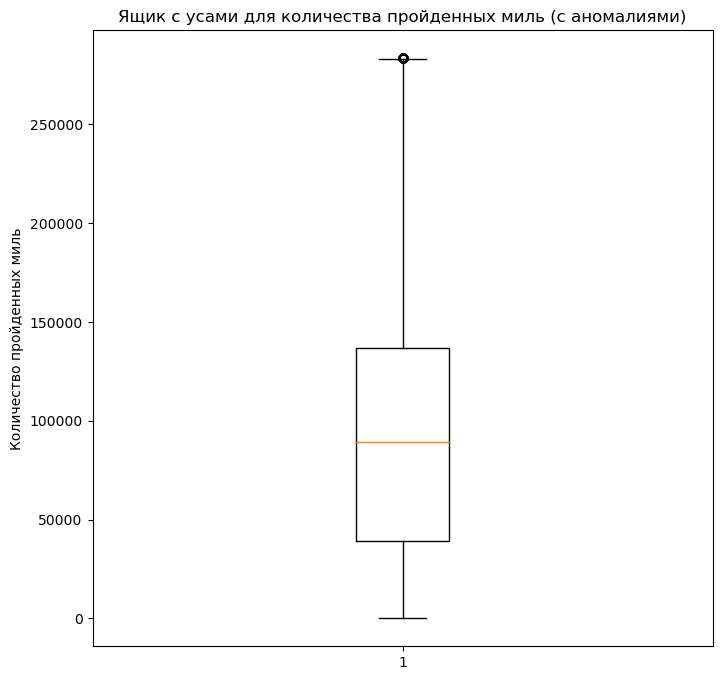

In [36]:
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(df.odometer)
ax.set_ylabel('Количество пройденных миль')
ax.set_title('Ящик с усами для количества пройденных миль (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [37]:
def calculate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    
    return boundaries

In [38]:
boundaries = calculate_outliers(df.odometer)
boundaries

(-107440.0, 283464.0)

In [39]:
# найдем выбросы в пробеге
is_outlier = (df.odometer < boundaries[0]) | (df.odometer > boundaries[1]) 
is_outlier.sum()

91

In [40]:
# выведем строки с выбросами
df[is_outlier]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
27,7311516735,https://easttexas.craigslist.org/cto/d/lufkin-2003-dodge-x4-diesel-dually/7311516735.html,tyler / east TX,https://easttexas.craigslist.org,17000,2003,dodge,3500,diesel,283466,clean,automatic,https://images.craigslist.org/00Q0Q_8WsRzpw9LVXz_0CI0t2_600x450.jpg,"2003 Dodge 3500 4x4 diesel dually. It has 307k miles on it with zero mechanical problems. In the past few years I have had the transfer case and transmission rebuilt along with new injectors and tires this year. $17,000 Firm with clean and clear title in hand. You can call or text me at show contact info . If I am unable to answer please be sure to leave me a message.",tx,31.270000,-94.646900,2021-04-23T14:27:25-0500,medium,2021-04-23 19:27:25+00:00
114,7310943842,https://showlow.craigslist.org/ctd/d/pinetop-2004-mazda-tribute-4x4-gas/7310943842.html,show low,https://showlow.craigslist.org,2795,2004,mazda,tribute,gas,283466,clean,automatic,https://images.craigslist.org/00y0y_9hjvC3qkk3hz_0ak07K_600x450.jpg,"ACCUSHINE AUTO SALES 1827 E. WHITE MTN. BLVD. PINETOP, AZ. 85935 (928) 367-0423 www.accushineautosales.com LIKE US ON FACEBOOK @ https://www.facebook.com/accushine/?ref=hl 2003 MAZDA TRIBUTE 3.0L 24 VALVE DOHC V6 ENGINE AUTOMATIC TRANSMISSION BLUE EXTERIOR DARK GRAY CLOTH INTERIOR OPTIONS: 4 WHEEL DRIVE POWER WINDOWS POWER DOOR LOCKS POWER STEERING POWER SIDE MIRRORS HEAT/AC CRUISE CONTROL AM/FM STEREO W/ CD PLAYER (USB AND AUXILIARY JACK) BLUETOOTH FOG LIGHTS ROOF RACK TOW PACKAGE WE HAVE EXPANDED OUR INVENTORY AND OFFER ALL TYPES OF VEHICLES FROM CARS AND TRUCKS TO VANS AND SUVS. COME VISIT THE LARGEST SELECTION OF QUALITY PRE-OWNED VEHICLES IN THE WHITE MOUNTAINS FOR UNDER $5000 AND SEE WHAT WE CAN DO FOR YOU! ALL TITLE AND REGISTRATION WORK DONE HERE ON PREMISES.",az,34.117500,-109.919700,2021-04-22T10:52:07-0700,low,2021-04-22 17:52:07+00:00
385,7306101528,https://desmoines.craigslist.org/ctd/d/windom-2013-caterpillar-ct660s-heavy/7306101528.html,des moines,https://desmoines.craigslist.org,59950,2013,other,CATERPILLAR CT660S,diesel,283466,clean,automatic,https://images.craigslist.org/00I0I_UkoGuDPqYZz_0cU08B_600x450.jpg,"LA MOTORSPORTS DIESELTRUCKSMN.COM 2013 CATERPILLAR CT660S -- CT13 475HP -- $59,950 FEATURING: DAY CAB TRI AXLE 76K GVWR 20K PUSHER WET KIT CX31 AUTOMATIC 6 SPEED TRANSMISSION!! FULL LOCKERS!! DUAL STEERING BOXES!! CT13 475HP CAT HEAVY DUTY HITCH AIR RIDES DRIVERS SEAT EXHAUST BRAKE PTO AIR SLIDING 5TH WHEEL PLATE ONE OWNER NORTH DAKOTA TRUCK EVERYTHING FUNCTIONS PROPERLY RUNS AND DRIVES GREAT PROFESSIONALLY DETAILED FULLY SERVICED 345,256 MILES **FOR 50+ PICTURES, VISIT DIESELTRUCKSMN.COM 🚘 We take all trades! 💲 We offer financing in Minnesota and Wisconsin! 💲 https://montanacommercialcredit.com/apply-now/ 🚚 We offer FREE 150 mile delivery! 🛫 We provide transportation to/from the airport ☎ For more info CALL or TEXT BRANDON at (507) 822-6617 LA Motorsports 703 1st Avenue Windom, MN 56101 OFFICE: (507) 831-5000 CELL: (507) 822-6617 We are located in Southwest MN, just a couple short hours from the Twin Cities.",ia,43.863689,-95.113792,2021-04-13T08:34:24-0500,high,2021-04-13 13:34:24+00:00
444,7304168190,https://elpaso.craigslist.org/ctd/d/las-cruces-2016-jeep-renegade-limited/7304168190.html,el paso,https://elpaso.craigslist.org,16999,2016,jeep,renegade,gas,283466,clean,automatic,https://images.craigslist.org/00Q0Q_ajHii9qB6ebz_0c5095_600x450.jpg,"‘16 Jeep Renegade Limited, auto, air, power windows, locks, and mirrors, tilt, cruise, Bluetooth, heated seats, leather, back up camera, automatic headlights, and more. Was $17,499, NOW JUST $16,999. Call AutoPlex Used Select in Las Cruces today! (575) 525-4500 or (800) 376-2277 TB-52756",tx,32.288990,-106.781616,2021-04-09T09:26:05-0600,medium,2021-04-09 15:26:05+00:00
552,7314722320,https://nh.craigslist.org/ctd/d/medford-201

In [41]:
# заменим значение пробега верхенй границей
df.loc[is_outlier, 'odometer'] = int(boundaries[1])
df['odometer'].describe()

count      9997.000000
mean      93332.980794
std       63183.696745
min           0.000000
25%       39149.000000
50%       89000.000000
75%      136875.000000
max      283464.000000
Name: odometer, dtype: float64

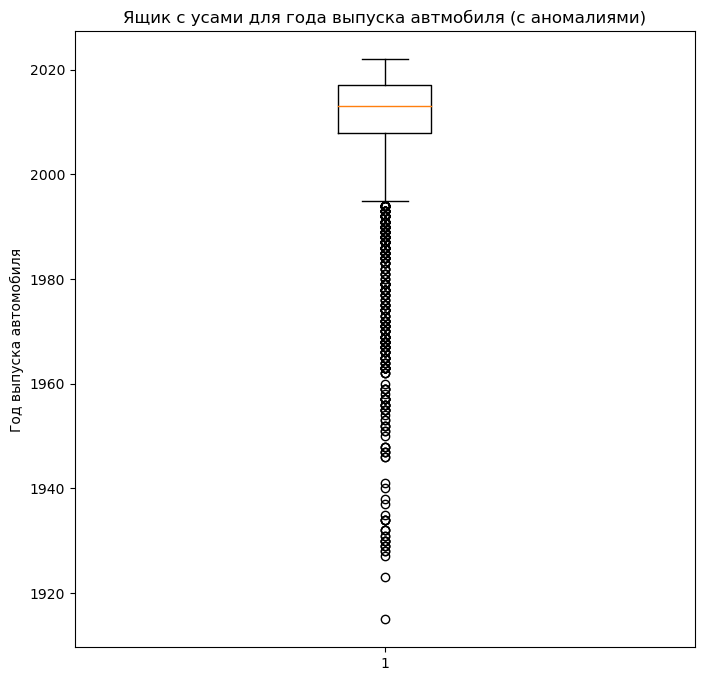

In [42]:
# выбросы в годе выпуска автомобиля находятся за нижней границей
from matplotlib.ticker import FormatStrFormatter

fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(df.year)
ax.set_ylabel('Год выпуска автомобиля')
ax.set_title('Ящик с усами для года выпуска автмобиля (с аномалиями)')

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [43]:
# найдем границы для года выпуска
boundaries = calculate_outliers(df.year)
boundaries

(1994.5, 2030.5)

In [44]:
# найдем выбросы в годе автомобиля
is_outlier = (df.year < boundaries[0]) | (df.year > boundaries[1]) 
print('Доля выбросов в годе автомобиля', is_outlier.sum()/len(df))

Доля выбросов в годе автомобиля 0.03941182354706412


In [45]:
# выведем строки с выбросами
df[is_outlier].sort_values('year')

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
401,7308847796,https://billings.craigslist.org/cto/d/columbus-1915-model-runabout/7308847796.html,billings,https://billings.craigslist.org,5000,1915,ford,model t,gas,12345,clean,manual,https://images.craigslist.org/01616_88aseKpgubTz_0CI0lM_600x450.jpg,"Things included New Rootlieb front and rear fenders still in box New Radiator with brass shell, New wood spoke wheels, New (25 years old) tires, New Snyders aluminum hood, New sheet metal on the front portion of the cab. Many extra parts as shown. New wood kit. Not included No top bows, No seat, No wiring, No guages. This has no rust. Engine turns over. I'm selling this for my in laws as they do not have internet. Contact me with your information and I will give the information to them and they will contact you by phone.",mt,45.626200,-109.257100,2021-04-18T12:20:03-0600,low,2021-04-18 18:20:03+00:00
6342,7314390836,https://kansascity.craigslist.org/ctd/d/odessa-1923-bucket/7314390836.html,"kansas city, MO",https://kansascity.craigslist.org,14950,1923,ford,t-bucket,gas,15000,clean,automatic,https://images.craigslist.org/00E0E_kfyzxZlR3yjz_0cU09G_600x450.jpg,"1923 T bucket 550ci 700Hp BBC World product heads World product intake Holly classic double pumper CV product pan 4 speed auto trans Holly GPH-110 fuel pump Strange axles Ford 9” 4.11 gear Afco shocks Metal bed Fiberglass body Fully street legal car that ran 9.50s at 140mph Video at www.nmotionsales.com Call or Text, 816-809-4152",ks,38.982900,-93.975700,2021-04-29T12:12:18-0500,medium,2021-04-29 17:12:18+00:00
5014,7313024973,https://prescott.craigslist.org/cto/d/cottonwood-1927-chevrolet-coupe/7313024973.html,prescott,https://prescott.craigslist.org,18500,1927,chevrolet,coupe,gas,100,clean,manual,https://images.craigslist.org/00r0r_j4bp7r0piTsz_0ak0ak_600x450.jpg,"1927 Chevy Capitol A Coupe, all original, 2nd owner. First owner was the mayor in Flagstaff, Az. 2.8 Liter overhead valve 4 cyl, 3 speed single carb. 12 volt w/alternator This car was totally restored. Interior restored and engine rebuilt. Has the original owners manual. Runs and drives fine. Original steering wheel, all glass original. Garaged in Dewey, Az. Asking price is $18,500. Call or text: show contact info",az,34.571326,-112.104943,2021-04-26T13:52:28-0700,medium,2021-04-26 20:52:28+00:00
6329,7316455114,https://tucson.craigslist.org/cto/d/tucson-1928-chrysler-rat-rod/7316455114.html,tucson,https://tucson.craigslist.org,7800,1928,other,1928 Crysler,gas,100,clean,automatic,https://images.craigslist.org/00B0B_1FiYNYzHasfz_0lM0t2_600x450.jpg,"Here for sale is a nice Rat Rod, the body is a 1928 Chrysler, 440 Chrysler engine, power steering, telescoping steering wheel, upgraded alternator and ignition system to no points. This has a soft top that snaps off, unique items like a keg gas tank, saw blades accents etc. Text or email as i have a short video of the motor running. Please see the pictures, ask questions if you like, I don't need help selling this car and scammers don't waste your time. The price is $7800 or best offer.",az,32.188659,-110.769482,2021-05-03T14:52:05-0700,low,2021-05-03 21:52:05+00:00
6476,7312752494,https://rochester.craigslist.org/cto/d/hilton-1928-ford-model-sport-coupe/7312752494.html,rochester,https://rochester.craigslist.org,45000,1928,ford,sport coupe,gas,2520,clean,automatic,https://images.craigslist.org/00q0q_gUJUnEwtJiWz_0wM0oA_600x450.jpg,"This 1928 Ford Model A Sport Coupe, was a 2008 Detroit Autorama winner. Open Wheel, period correct, Hot Rod, on Deuce Rails. (For the younger crowd, it is a 1928 Ford Coupe on a 1932 Ford frame.) Back in the day, that was the hot setup. Starting at the front, it has a 4 inch dropped, drilled axle, with 1948 Ford split wishbones with the spring perches removed and welded 6 inches farther back, on the inside of the wishbones, to m

In [46]:
# видно,что это в больше всего в категории низкой цены, старый автомобиль  - низкая цена.
df.price_category[is_outlier].value_counts()

low       181
medium    135
high       78
Name: price_category, dtype: int64

In [47]:
# заменим выбросы года выпуска значением минимальной границы и проверим
df.loc[is_outlier, 'year'] = int(boundaries[0])
df.year.describe()

count    9997.000000
mean     2011.694508
std         6.520959
min      1994.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2022.000000
Name: year, dtype: float64

# Feature engineering

## Построение категориальных признаков из строк

In [49]:
# Длина названия модели
df['short_model'] = df.model.apply(lambda x: x.split()[0])

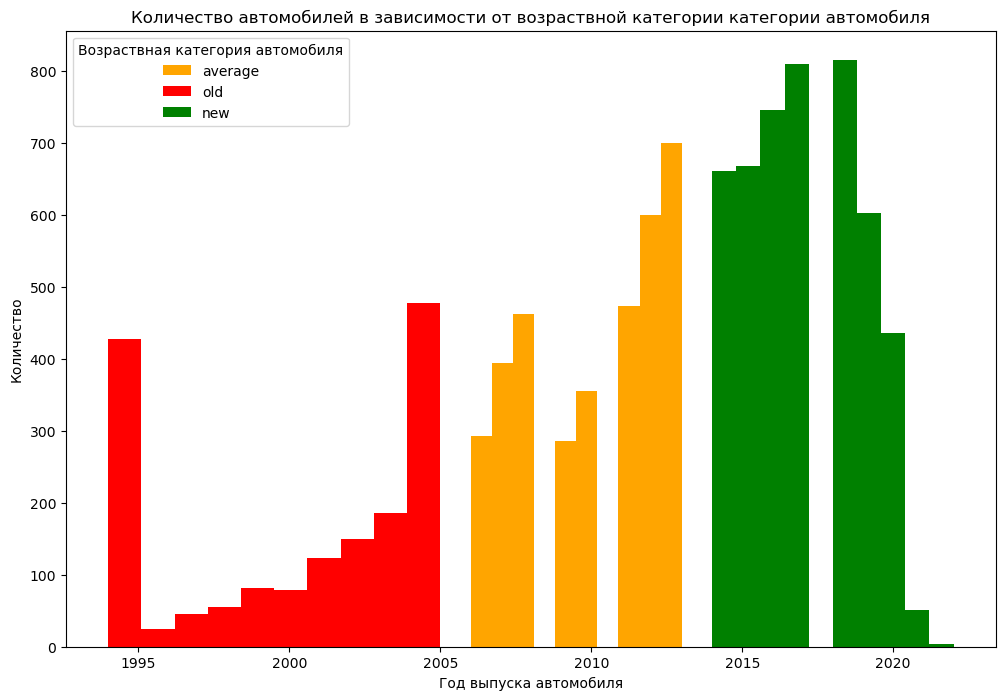

In [50]:
# Возрастная категория автомобиля
df['age_category'] = df.year.apply(lambda x: 'old' if x < 2006 else ('new' if x > 2013 else 'average'))
colors = {'average': 'orange', 'old': 'red', 'new': 'green',}

fig, ax = plt.subplots(figsize=(12, 8))
for age_category in colors:
    color = colors[age_category]
    data = df[df['age_category'] == age_category]

    ax.hist(data['year'], color=color)
    
plt.ylabel('Количество')
plt.xlabel('Год выпуска автомобиля')
plt.title('Количество автомобилей в зависимости от возраствной категории категории автомобиля')
plt.legend(colors, title="Возраствная категория автомобиля");

In [51]:
# преобразование категориальных переменных
columns = ['short_model', 'fuel', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category']
for column in columns:
    print(column, df[column].nunique())

short_model 989
fuel 5
transmission 3
region 393
manufacturer 40
state 51
title_status 6
age_category 3


In [52]:
data = df[columns]
ohe = OneHotEncoder(sparse=False)
ohe.fit(data[columns])
ohe_data = ohe.transform(data[columns])
ohe_data.shape
ohe_data

array([[0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [53]:
df[ohe.get_feature_names()] = ohe_data

D:\Work\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = f

C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names()] = ohe_data
C:\Users\Виктория\AppData\Local\Temp\ipykernel_6024\3293346441.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider j

In [54]:
df.head

<bound method NDFrame.head of               id  \
0     7308295377   
1     7316380095   
2     7313733749   
3     7308210929   
4     7316474668   
...          ...   
9995  7304876387   
9996  7316152972   
9997  7310993818   
9998  7306637427   
9999  7311960763   

                                                                                                   url  \
0      https://chattanooga.craigslist.org/ctd/d/chattanooga-2020-ram-2500-crew-cab-big/7308295377.html   
1                  https://newjersey.craigslist.org/ctd/d/carlstadt-2016-ford-explorer/7316380095.html   
2                    https://reno.craigslist.org/ctd/d/atlanta-2017-vw-volkswagen-golf/7313733749.html   
3       https://fayetteville.craigslist.org/ctd/d/raleigh-2013-toyota-rav4-xle-4dr-suv/7308210929.html   
4     https://newyork.craigslist.org/lgi/cto/d/baldwin-2021-nissan-altima-sv-with-only/7316474668.html   
...                                                                                          

## Cоздание дополнительных фичей

In [55]:
df['odometer/price'] = df.apply(lambda x: x.odometer / x.price, axis=1) # отношение пробега к стоимости автомобиля:
df['model_len'] = df.apply(lambda x: len(x.model), axis = 1) # длина названия модели автомобиля
df['model_word_count'] = df['model'].apply(lambda x: len(x.split())) # к-во слов в модели автомобиля
df['model_in_desc'] = df.apply(lambda x: x.description.count(x.model) , axis=1) # к-во упоминаний модели автомобиля в описании
df['desc_len'] = df.apply(lambda x: len(x.description) , axis=1) # длина описания автомобиля 

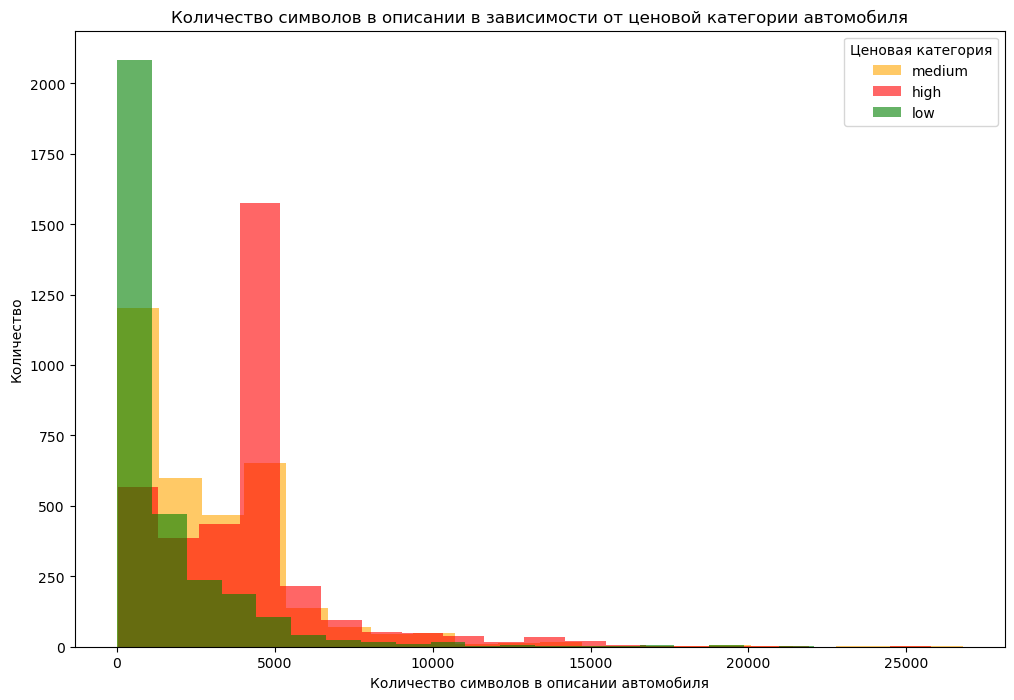

In [56]:
# длина описания автомобиля и зависимоcть от ценовой категории
colors = {'medium': 'orange', 'high': 'red', 'low': 'green',}

fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df[df['price_category'] == price_category]

    ax.hist(data['desc_len'], color=color, alpha=0.6, bins=20)
    
plt.ylabel('Количество')
plt.xlabel('Количество символов в описании автомобиля')
plt.title('Количество символов в описании в зависимости от ценовой категории автомобиля')
plt.legend(colors, title="Ценовая категория");

In [57]:
# построение признаков из дат
df['date'] = pd.to_datetime(df.date, utc = True) # ????????????????????????????????????????????????????????????
df['month'] = df['date'].dt.month # номер месяца размещения объявления о продаже
df['dayofweek'] = df['date'].dt.day # день недели размещения объявления о продаже
df['diff_years'] = df.apply(lambda x: x.date.year - x.year, axis=1) # к-во лет между годом производства и годом размещения объявления
df[['month', 'dayofweek', 'diff_years']]

,month,dayofweek,diff_years
0,4,17,1
1,5,3,5
2,4,28,4
3,4,17,8
4,5,3,0
...,...,...,...
9995,4,10,19
9996,5,3,13
9997,4,22,10
9998,4,14,6


In [58]:
# стандартизация 
columns = ['odometer/price', 'lat', 'long', 'year', 'desc_len', 'model_len', 'model_in_desc', 'model_word_count',
          'diff_years', 'month', 'dayofweek']
data = df[columns]
std_scaler = StandardScaler()
std_scaler.fit(data[columns])
std_scaled = std_scaler.transform(data[columns])
columns_std = []
for column in columns:
    columns_std.append(column + '_std')
columns_std
df[columns_std] = std_scaled
df.head

<bound method NDFrame.head of               id  \
0     7308295377   
1     7316380095   
2     7313733749   
3     7308210929   
4     7316474668   
...          ...   
9995  7304876387   
9996  7316152972   
9997  7310993818   
9998  7306637427   
9999  7311960763   

                                                                                                   url  \
0      https://chattanooga.craigslist.org/ctd/d/chattanooga-2020-ram-2500-crew-cab-big/7308295377.html   
1                  https://newjersey.craigslist.org/ctd/d/carlstadt-2016-ford-explorer/7316380095.html   
2                    https://reno.craigslist.org/ctd/d/atlanta-2017-vw-volkswagen-golf/7313733749.html   
3       https://fayetteville.craigslist.org/ctd/d/raleigh-2013-toyota-rav4-xle-4dr-suv/7308210929.html   
4     https://newyork.craigslist.org/lgi/cto/d/baldwin-2021-nissan-altima-sv-with-only/7316474668.html   
...                                                                                          

In [59]:
# нормализация
data_coord = df[['lat', 'long']]
mm_scaler = MinMaxScaler()
mm_scaler.fit(data_coord[['lat', 'long']])
mm_scaled = mm_scaler.transform(data_coord[['lat', 'long']])
df[['lat_mm', 'long_mm']] = mm_scaled
columns_geo = ['lat', 'lat_std', 'lat_mm', 'long', 'long_std', 'long_mm']
df[columns_geo].corr()

,lat,lat_std,lat_mm,long,long_std,long_mm
lat,1.000000,1.000000,1.000000,-0.164713,-0.164713,-0.164713
lat_std,1.000000,1.000000,1.000000,-0.164713,-0.164713,-0.164713
lat_mm,1.000000,1.000000,1.000000,-0.164713,-0.164713,-0.164713
long,-0.164713,-0.164713,-0.164713,1.000000,1.000000,1.000000
long_std,-0.164713,-0.164713,-0.164713,1.000000,1.000000,1.000000
long_mm,-0.164713,-0.164713,-0.164713,1.000000,1.000000,1.000000


In [60]:
# удаление неинформативных колонок
columns_for_drop = ['year', 'url', 'region', 'region_url', 'manufacturer',
                    'model', 'fuel', 'odometer', 'title_status', 'transmission',
                    'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
                    'odometer/price', 'short_model', 'lat_mm', 'long_mm', 'date',
                    'desc_len', 'age_category', 'model_len', 'model_word_count', 'model_in_desc',
                    'month', 'dayofweek', 'diff_years']
df = df.drop(columns_for_drop, axis = 1)

In [61]:
df.to_csv('data/df_out_prepared.csv', index=False)

In [4]:
df = pd.read_csv('data/df_out_prepared.csv')
df.shape

(9997, 1504)

# Modeling

In [5]:
# формирование датасета для обучения, инициализация фичий и целевой переменной
x = df.drop(['price', 'odometer/price_std', 'price_category', 'id'], axis=1)
y = df.price_category

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Логистическая регрессия

In [6]:
# параметры по умолчанию
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

print('accuracy на тренировочной выборке:', accuracy_score(y_train, logreg.predict(x_train)))
print('accuracy на тестовой выборке:', accuracy_score(y_test,  logreg.predict(x_test)))
confusion_matrix(y_test, logreg.predict(x_test))

accuracy на тренировочной выборке: 0.8283550092896956
accuracy на тестовой выборке: 0.7453333333333333


D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[877,  41, 160],
       [ 31, 755, 161],
       [151, 220, 604]], dtype=int64)

In [7]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# подбор параметров
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

#C = [0.001, 0.01, 0.1, 1, 10, 100,]
max_iter = [int(x) for x in np.linspace(start = 50, stop = 500, num = 20)]
penalty = ['l1', 'l2', 'none', 'elasticnet']
solver = ['lbfgs', 'newton-cg', 'sag', 'saga', 'liblinear']
random_state = [int(x) for x in np.linspace(start = 0, stop = 100, num = 20)]


param_dist = { #'C': C,
               'max_iter': max_iter,
               'penalty': penalty,
               'solver': solver,
               'random_state': random_state}

rs = RandomizedSearchCV(logreg, param_dist)
rs.fit(x_train, y_train)
rs.best_params_

In [8]:
# Логистическая регрессия с параметрами
logreg_tuned = LogisticRegression(random_state = 47, solver = 'sag', penalty = 'l2', max_iter = 350, C = 1)
logreg_tuned.fit(x_train, y_train)


pred_logreg_tuned_train = logreg_tuned.predict(x_train)
pred_logreg_tuned_test = logreg_tuned.predict(x_test)

print('accuracy на тренировочной выборке', accuracy_score(y_train, pred_logreg_tuned_train))
print('accuracy на тестовой выборке', accuracy_score(y_test, pred_logreg_tuned_test))
confusion_matrix(y_test, pred_logreg_tuned_test)

accuracy на тренировочной выборке 0.8256395598113477
accuracy на тестовой выборке 0.7473333333333333


D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([[879,  41, 158],
       [ 31, 756, 160],
       [148, 220, 607]], dtype=int64)

# Случайный лес

In [9]:
# Случайный лес по умолчанию
rf_clf = RandomForestClassifier(random_state=50)
rf_clf.fit(x_train, y_train)

pred_rf_train = rf_clf.predict(x_train)
pred_rf_test = rf_clf.predict(x_test)

print('accuracy на тренировочной выборке', accuracy_score(y_train, rf_clf.predict(x_train)))
print('accuracy на тестовой выборке', accuracy_score(y_test, pred_rf_test))

confusion_matrix(y_test, pred_rf_test)

accuracy на тренировочной выборке 1.0
accuracy на тестовой выборке 0.7573333333333333


array([[899,  40, 139],
       [ 22, 798, 127],
       [163, 237, 575]], dtype=int64)

In [10]:
rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 50,
 'verbose': 0,
 'warm_start': False}

In [35]:
# Случайный лес с параметрами 
rf_clf_tuned = RandomForestClassifier(random_state=50, n_estimators = 150)
rf_clf_tuned.fit(x_train, y_train)

pred_rf_train_tuned = rf_clf_tuned.predict(x_train)
pred_rf_test_tuned = rf_clf_tuned.predict(x_test)

print('accuracy на тренировочной выборке', accuracy_score(y_train, pred_rf_train_tuned))
print('accuracy на тестовой выборке', accuracy_score(y_test, pred_rf_test_tuned))

confusion_matrix(y_test, pred_rf_test)

accuracy на тренировочной выборке 1.0
accuracy на тестовой выборке 0.761


array([[899,  40, 139],
       [ 22, 798, 127],
       [163, 237, 575]], dtype=int64)

# Многослойный персептрон

In [36]:
# Многослойный персептрон с параметрами по умолчанию
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(x_train, y_train)

print('accuracy на тренировочной выборке', accuracy_score(y_train, mlp.predict(x_train)))
print('accuracy на тестовой выборке', accuracy_score(y_test, mlp.predict(x_test)))

accuracy на тренировочной выборке 0.9998570816064027
accuracy на тестовой выборке 0.7476666666666667


In [37]:
mlp.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 500,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [38]:
mlp.n_layers_

3

In [39]:
# Многослойный персептрон с параметрами
mlp_tuned = MLPClassifier(random_state=42, max_iter=200, hidden_layer_sizes=(100,20), activation = 'logistic')
mlp_tuned.fit(x_train, y_train)

pred_mlp_tuned_train = mlp_tuned.predict(x_train)
pred_mlp_tuned_test = mlp_tuned.predict(x_test)

print('accuracy на тренировочной выборке', accuracy_score(y_train, pred_mlp_tuned_train))
print('accuracy на тестовой выборке', accuracy_score(y_test, pred_mlp_tuned_test))
confusion_matrix(y_test, pred_mlp_tuned_test)

D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


accuracy на тренировочной выборке 0.9405459482635415
accuracy на тестовой выборке 0.768


array([[893,  30, 155],
       [ 30, 742, 175],
       [131, 175, 669]], dtype=int64)

## Кросс-валидация

In [40]:
cross_val_score(logreg_tuned, x, y, cv=5)

D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


array([0.7575    , 0.746     , 0.73836918, 0.74137069, 0.74437219])

In [41]:
cross_val_score(rf_clf_tuned, x, y, cv=5)

array([0.7715    , 0.7605    , 0.76488244, 0.76588294, 0.75137569])

In [42]:
cross_val_score(mlp_tuned, x, y, cv=5)

D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum ite

array([0.778     , 0.787     , 0.76588294, 0.75237619, 0.7813907 ])

In [43]:
for model in [logreg_tuned, rf_clf_tuned, mlp_tuned]:
  cv_score = cross_val_score(model, x, y, cv=5)
  print(model, cv_score.mean(), cv_score.std())

D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(C=1, max_iter=350, random_state=47, solver='sag') 0.7455224112056028 0.006533287393280798
RandomForestClassifier(n_estimators=150, random_state=50) 0.7628282141070535 0.006713151534258778


D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 20),
              random_state=42) 0.7730299649824912 0.012430956669200506


D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Results

In [44]:
# наилучший результат показала модель многослойный персептрона
# обучим ее на всем датасете
mlp_tuned.fit(x, y)

D:\Work\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(100, 20),
              random_state=42)

In [46]:
with open('model.pickle', 'wb') as file:
  pickle.dump(mlp_tuned, file)